# **Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Borrow Library

In [2]:
from sklearn.datasets import make_circles

# Create Data to View & fit

In [3]:
n_samples =1000

In [4]:
X,Y = make_circles(
    n_samples,
    noise= 0.03,
    random_state=42
)

In [5]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [7]:
X.shape, Y.shape

((1000, 2), (1000,))

In [8]:
circles = pd.DataFrame({'X0': X[:,0] , 'X1': X[:,1] , 'label':Y})

In [9]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


# Visualize The Plot

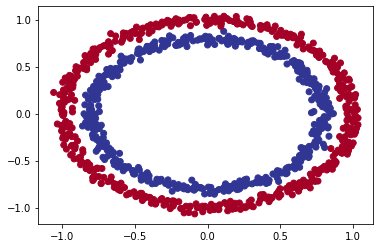

In [10]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

In [11]:
X.shape, Y.shape

((1000, 2), (1000,))

In [12]:
len(X), len(Y)

(1000, 1000)

In [13]:
X[0], Y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps In Modelling

In [14]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
]) 

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_1.fit(tf.expand_dims(X,axis=1), Y, epochs=100, verbose=0)

In [16]:
model_1.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932516098022461, 0.5]

# Model No 2

In [20]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2.fit(tf.expand_dims(X, axis=1), Y, epochs=100, verbose=0)

In [22]:
model_2.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6940136551856995, 0.5]

# Model No 3

In [35]:
tf.random.set_seed(42)


model_3= tf.keras.Sequential([
                              tf.keras.layers.Dense(100, activation='relu'),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

model_3.fit(tf.expand_dims(X,axis=1), Y, epochs=500, verbose=0)

# Model No 4

In [41]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])


model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)


model_4.fit(tf.expand_dims(X,axis=1), Y, epochs=500, verbose = 0)

In [42]:
model_4.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

# Model No 5

In [44]:
tf.random.set_seed(42)


model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(1, activation='relu')
])

model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

model_5.fit(tf.expand_dims(X,axis=1), Y, epochs=500, verbose=0)

In [23]:
import numpy as np

In [30]:
def plot_prediction_boundry(model, X ,Y):
  
  # Define Axis Boundry of Plot & Create Meshgrid

  x_min, x_max = X[:,0].min()-0.1 , X[:,0].max()+0.1
  y_min , y_max = X[:,1].min()-0.1 , X[:,1].max()+0.1 

  # Create Meshgrid

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100)
                       )
  
  # Create X Values( We are Going To Make Predictions )

  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make Predictions

  y_pred = model.predict(x_in)


  # Check For Multiclass

  if len(y_pred[0]) > 1:
    print('Doing Multiclass Classification')
    y_pred = np.argmax(y_pred, axis=1), reshape(xx.shape)

  else:
      print("Doing Binary Classification")
      y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot The Decision Boundry

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

  # Plot Scatter Graph

  plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

  # X lim and Y lim

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())






Doing Binary Classification


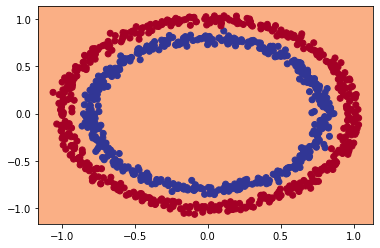

In [32]:
plot_prediction_boundry(model=model_2, X=X, Y=Y)

Doing Binary Classification


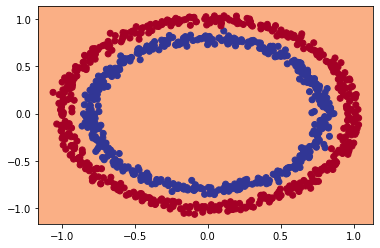

In [33]:
plot_prediction_boundry(model=model_1, X=X, Y=Y)

Doing Binary Classification


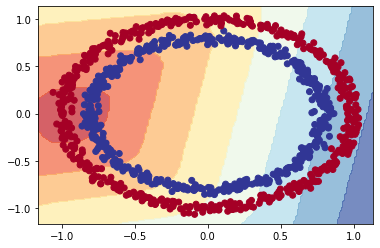

In [36]:
plot_prediction_boundry(model=model_3, X=X, Y=Y)

In [28]:
  # x_min, x_max = X[:,0].min()-0.1 , X[:,0].max()+0.1
  # y_min , y_max = X[:,1].min()-0.1 , X[:,1].max()+0.1
  
  # x_min , x_max, y_min, y_max


  
  # xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
  #                      np.linspace(y_min, y_max, 100)
  #                      )
  
  # xx, yy

Doing Binary Classification


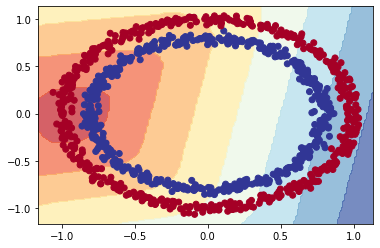

In [43]:
plot_prediction_boundry(model=model_4, X=X, Y=Y)

Doing Binary Classification


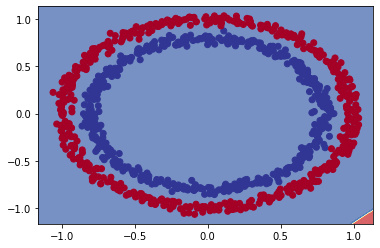

In [45]:
plot_prediction_boundry(model=model_5, X=X, Y=Y)

In [50]:
def plot_prediction_boundry_2(model, X,Y):
  x_min, x_max  = X[:,0].min()-0.1 , X[:,0].max()+0.1
  y_min , y_max = X[:,1].min()-0.1  , X[:,1].max()+0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print('Doing Multiclass Classifications')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
      print('Doing Binary Class Classifications')
      y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

  plt.scatter(X[:,0], X[:,1], c=Y, s=40, cmap = plt.cm.RdYlBu)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



Doing Binary Class Classifications


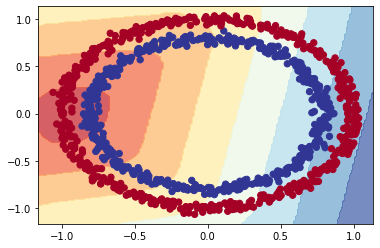

In [52]:
plot_prediction_boundry_2(model=model_3, X=X, Y=Y)

In [53]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [54]:
from sklearn.datasets import make_circles

In [55]:
n_samples = 1000

In [57]:
X,Y= make_circles(
    n_samples,
    noise=0.03,
    random_state= 42)

In [58]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [59]:
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [60]:
circles = pd.DataFrame({'X0' : X[:,0], 'X1' : X[:,1], 'label':Y})


In [61]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


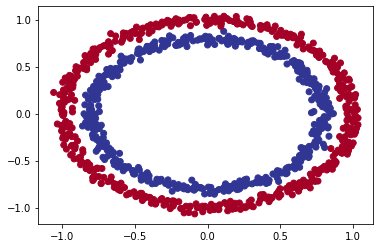

In [62]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

In [63]:
X.shape , Y.shape

((1000, 2), (1000,))

# Steps In Modelling

In [65]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_6.fit(tf.expand_dims(X, axis=1), Y, epochs=400, verbose=0)

In [67]:
model_6.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5070


[0.6932299733161926, 0.5070000290870667]

# Models

In [68]:
tf.random.set_seed(42)


model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(1, activation='relu')
])


model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.3),
    metrics=['accuracy']
)


model_7.fit(tf.expand_dims(X,axis=1), Y, epochs=800, verbose=0)


In [71]:
model_7.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [74]:
def plot_prediction_boundry_3(model, X,Y):
  x_min , x_max = X[:,0].min()-0.1 , X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1 , X[:,1].max()+0.1

  xx,yy = np.meshgrid(np.linspace(x_max, x_min, 100),
                      np.linspace(y_min, y_max, 100)
                      )
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print('Multiclass Classifications')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  
  else:
    print('Binary Classifications')
    y_pred = np.round(y_pred).reshape(xx.shape)


  plt.contourf(xx,yy,y_pred , cmap=plt.cm.RdYlBu, alpha=0.7)

  plt.scatter(X[:,0], X[:,1], c=Y, s=40, cmap=plt.cm.RdYlBu)  

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



Binary Classifications


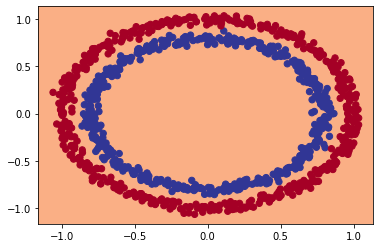

In [75]:
plot_prediction_boundry_3(model=model_1, X=X, Y=Y)

Binary Classifications


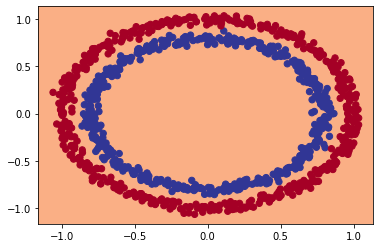

In [76]:
plot_prediction_boundry_3(model=model_2, X=X, Y=Y)

Binary Classifications


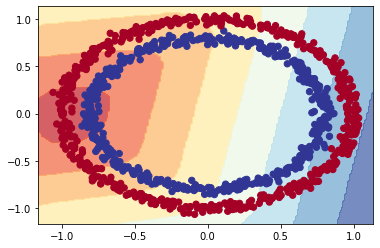

In [77]:
plot_prediction_boundry_3(model=model_3, X=X, Y=Y)

Binary Classifications


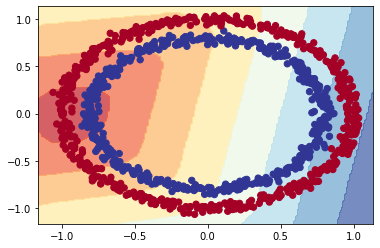

In [78]:
plot_prediction_boundry_3(model= model_4 , X=X, Y=Y)

Binary Classifications


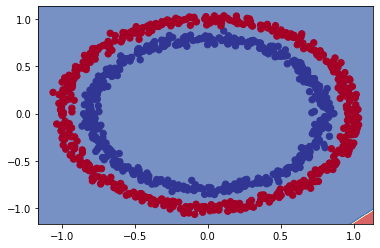

In [79]:
plot_prediction_boundry_3(model=model_5, X=X, Y=Y)

Binary Classifications


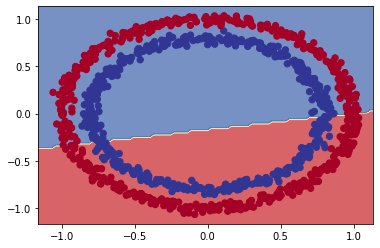

In [80]:
plot_prediction_boundry_3(model=model_6 , X=X, Y=Y)

Binary Classifications


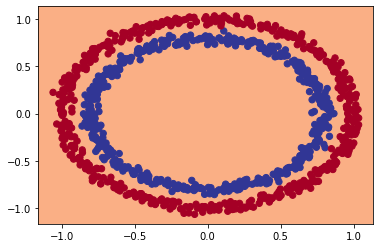

In [81]:
plot_prediction_boundry_3(model= model_7 , X=X, Y=Y)

Doing Binary Class Classifications


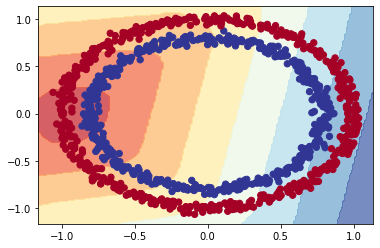

In [82]:
plot_prediction_boundry_2(model= model_3, X=X, Y=Y)

Doing Binary Class Classifications


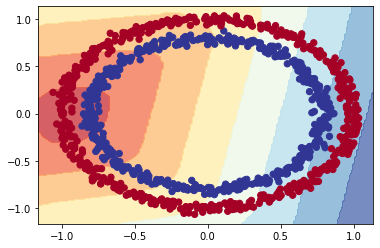

In [83]:
plot_prediction_boundry_2(model = model_4, X=X, Y=Y)

Doing Binary Class Classifications


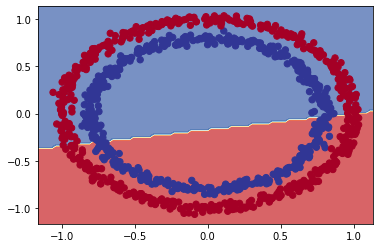

In [84]:
plot_prediction_boundry_2(model= model_6, X=X, Y=Y)

Doing Binary Classification


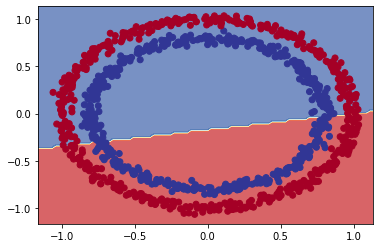

In [85]:
plot_prediction_boundry(model = model_6, X=X, Y=Y)

Doing Binary Class Classifications


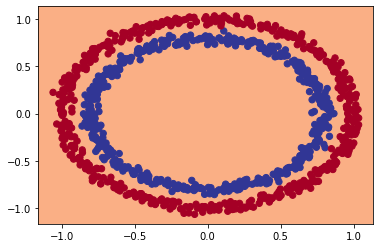

In [86]:
plot_prediction_boundry_2(model=model_2, X=X, Y=Y)